# NYC Census Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
import scipy.stats as stats

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [2]:
censusdf = pd.read_csv('nyc_census_tracts.csv')

In [3]:
censusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 36 columns):
CensusTract        2167 non-null int64
County             2167 non-null object
Borough            2167 non-null object
TotalPop           2167 non-null int64
Men                2167 non-null int64
Women              2167 non-null int64
Hispanic           2128 non-null float64
White              2128 non-null float64
Black              2128 non-null float64
Native             2128 non-null float64
Asian              2128 non-null float64
Citizen            2167 non-null int64
Income             2101 non-null float64
IncomeErr          2101 non-null float64
IncomePerCap       2121 non-null float64
IncomePerCapErr    2121 non-null float64
Poverty            2125 non-null float64
ChildPoverty       2107 non-null float64
Professional       2124 non-null float64
Service            2124 non-null float64
Office             2124 non-null float64
Construction       2124 non-null float64
Pro

In [4]:
censusdf.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [5]:
briefdf = censusdf[['CensusTract', 'Borough', 'TotalPop', 'Women', 'Income', 'Transit']]

In [6]:
briefdf.describe()

,CensusTract,TotalPop,Women,Income,Transit
count,2.167000e+03,2167.000000,2167.000000,2101.000000,2124.000000
mean,3.605476e+10,3888.667743,2035.855561,59101.320800,54.930885
std,2.594875e+07,2240.050968,1212.765249,28802.662945,16.605053
min,3.600500e+10,0.000000,0.000000,9829.000000,0.000000
25%,3.604703e+10,2359.500000,1224.500000,39073.000000,43.300000
50%,3.604712e+10,3550.000000,1848.000000,54505.000000,57.400000
75%,3.608103e+10,4957.500000,2571.500000,73272.000000,67.900000
max,3.608599e+10,28926.000000,15466.000000,244375.000000,100.000000


In [7]:
cleandf = briefdf.dropna(how='any')

In [8]:
cleandf.describe()

,CensusTract,TotalPop,Women,Income,Transit
count,2.101000e+03,2101.000000,2101.000000,2101.000000,2101.000000
mean,3.605462e+10,3998.266540,2095.968586,59101.320800,55.096050
std,2.591998e+07,2172.579526,1179.150247,28802.662945,16.181942
min,3.600500e+10,29.000000,13.000000,9829.000000,0.000000
25%,3.604703e+10,2455.000000,1272.000000,39073.000000,43.500000
50%,3.604712e+10,3623.000000,1871.000000,54505.000000,57.500000
75%,3.608103e+10,5002.000000,2602.000000,73272.000000,67.900000
max,3.608503e+10,28926.000000,15466.000000,244375.000000,100.000000


In [9]:
cleandf.CensusTract.head()

1    36005000200
2    36005000400
3    36005001600
4    36005001900
5    36005002000
Name: CensusTract, dtype: int64

# Pulling in Census Block Location Data

In [10]:
locationdf = pd.read_csv('census_block_loc.csv')

In [11]:
locationdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38396 entries, 0 to 38395
Data columns (total 5 columns):
Latitude     38396 non-null float64
Longitude    38396 non-null float64
BlockCode    38396 non-null int64
County       38396 non-null object
State        38396 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ MB


In [12]:
locationdf.head(20)

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ
5,40.48,-74.264171,340230074021000,Middlesex,NJ
6,40.48,-74.261005,340230074021000,Middlesex,NJ
7,40.48,-74.257839,340230074021000,Middlesex,NJ
8,40.48,-74.254673,340230074025000,Middlesex,NJ
9,40.48,-74.251508,340230074025000,Middlesex,NJ


# Merging the Datasets

In [13]:
locationdf['CensusTract'] = locationdf.BlockCode.astype('str').str[:11]

In [14]:
locationdf['CensusTract'] = locationdf.CensusTract.astype('int64')

In [15]:
locationdf.CensusTract.head(20)

0     34023007600
1     34023007600
2     34023007600
3     34023007600
4     34023007402
5     34023007402
6     34023007402
7     34023007402
8     34023007402
9     34023007402
10    34023007402
11    34023008001
12    34023008001
13    34023008001
14    34023008001
15    36085990100
16    36085990100
17    36085990100
18    36085990100
19    36085990100
Name: CensusTract, dtype: int64

In [16]:
mergedf = pd.merge(cleandf, locationdf, on='CensusTract', how='inner')

In [17]:
mergedf.sample(20)

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,BlockCode,County,State
2621,36047025700,Brooklyn,2177,966,51310.0,62.2,40.699347,-73.944422,360470257003003,Kings,NY
310,36005009300,Bronx,6517,2842,30159.0,45.4,40.801106,-73.877940,360050093000002,Bronx,NY
9697,36085003900,Staten Island,2495,1233,60650.0,44.5,40.620201,-74.093216,360850039002003,Richmond,NY
1408,36005040400,Bronx,2818,1374,36691.0,48.0,40.887035,-73.852613,360050404003001,Bronx,NY
3479,36047055700,Brooklyn,2384,1147,92222.0,71.0,40.719698,-73.960251,360470557001001,Kings,NY
6497,36081035800,Queens,4094,2272,75368.0,37.0,40.676734,-73.754472,360810358002014,Queens,NY
3942,36047079400,Brooklyn,1964,1008,45227.0,73.8,40.647337,-73.953920,360470794002001,Kings,NY
377,36005011700,Bronx,1603,816,25483.0,55.3,40.801106,-73.868442,360050117000002,Bronx,NY
265,36005009000,Bronx,3476,1795,27000.0,47.8,40.807889,-73.843116,360050090000005,Bronx,NY
1029,36005029301,Bronx,1989,1112,102045.0,41.7,40.889296,-73.928593,360050293010001,Bronx,NY


In [18]:
mergedf.shape

(11947, 11)

In [19]:
mergedf['%Women'] = mergedf['Women']/mergedf['TotalPop']

In [20]:
mergedf.head()

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,BlockCode,County,State,%Women
0,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.862111,360050002000001,Bronx,NY,0.507866
1,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.858945,360050002000001,Bronx,NY,0.507866
2,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.862111,360050002000001,Bronx,NY,0.507866
3,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.858945,360050002000001,Bronx,NY,0.507866
4,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.855779,360050002000001,Bronx,NY,0.507866


# Income Ranking

In [55]:
highincome = mergedf.Income > 100000

highincomedf = mergedf[highincome]

incgroup = highincomedf.groupby(['CensusTract'])
incmeans = incgroup.agg({'Income': 'mean', 'TotalPop': 'mean'})

incmeans.nlargest(20, 'Income')

,Income,TotalPop
CensusTract,,
36061013000,244375.0,3277
36061014200,235455.0,4467
36061016001,222222.0,3861
36047002100,208036.0,4295
36061011401,197500.0,1276
36061011202,192857.0,287
36061006900,183750.0,2604
36061003100,183500.0,2673
36061031703,182401.0,8875


In [ ]:
manhattanonly = highincomedf.Borough == 'Manhattan'

manhathighincdf = highincomedf[manhattanonly]

manhathighincdf.head()

In [41]:
manhathighincdf.Latitude.min()

40.694824120599996

In [23]:
incomemapdata = manhathighincdfdf.filter(['Income', 'Latitude', 'Longitude'])

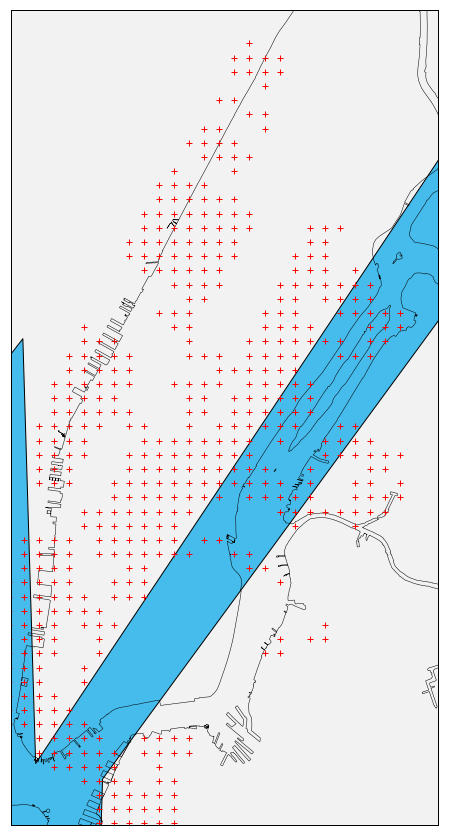

In [64]:
fig, ax = plt.subplots(figsize=(15,15))

incomemap = Basemap(resolution = 'l', projection = 'merc', llcrnrlon=-74.02, llcrnrlat=40.69, urcrnrlon=-73.93, urcrnrlat=40.82)

incomemap.drawmapboundary(fill_color='#46bcec')
incomemap.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
incomemap.drawcoastlines()

x,y = (incomemapdata.Longitude.tolist(), incomemapdata.Latitude.tolist())

incomemap.readshapefile('stationmap', 'stations')
incomemap.readshapefile('boroughs', 'boroughs')

incomemap.plot(x, y, marker='+', latlon=True, linestyle='None', color='r')

plt.savefig('')

# % Women Ranking

In [59]:
womengroup = mergedf.groupby(['CensusTract'])
womenmeans = womengroup.agg({'%Women': 'mean', 'TotalPop': 'mean'})

womenmeans.nlargest(20, '%Women')

,%Women,TotalPop
CensusTract,,
36061020500,0.669166,5069
36081033402,0.664574,13061
36005043500,0.653846,52
36047090800,0.653460,5679
36047110600,0.649617,4438
36081155101,0.643554,1947
36047035700,0.642657,2499
36047094402,0.642587,2907
36047035100,0.638945,4437


# Largest Public Transit Areas

In [ ]:
transitgroup = mergedf.groupby(['CensusTract'])
transitmeans = womengroup.agg({'Transit': 'mean', 'TotalPop': 'mean'})

transitmeans.nlargest(20, 'Transit')